# **[Week 2] Linear Classification**


# **Notice**
**Practice session evaluation criteria**

Evaluation will be based on attitude towards learning, participation and demonstrated performance/progresses throughout practice sessions

In each unit, we will be monitoring whether you are learning what you need to learn: ability to implement the basic concepts, rather than your coding skills per se. We will not do a strict evaluation of whether your results are correct or not. We just want to be sure whether you are going in the right direction.

Practice session proceedings
- 15-20 min code skeleton description
- individual practice session after description

During the practice session, students are required to complete the missing parts of the code that we provided. After finishing, students must have their code reviewed and confirmed by TA before leaving the classroom. The correct answer will be uploaded after the class in KLMS.

# **Linear Classification Practice**
## **Objective**
* Implement a Perceptron Classifier
* Understand and Implement Gradient Descent on Synthetic Data
  * Compute Loss and Gradients of Perceptron
  * Apply Gradient Descent on Perceptron Weights and Bias
  * Train a Perceptron with Stochastic Gradient Descent (SGD)
  * Train a Perceptron with mini-Batch Gradient Descent (SGD)
  * (Optional) Train a Perceptron with SGD Using Scikit-Learn Package
+ (Optional) Implement a Perceptron and train perceptron on different dataset


In [1]:
# Setting
import numpy as np
import sklearn

import matplotlib.pyplot as plt

# **Task 1: Train a Linear Classifier on Synthetic Data**

### Generating Synthetic Data from Gaussian Distribution
* Generate synthetic training data that follows two different gaussian distributions with different mean and variance
* Generate synthetic test data that follows same distributions with training data
* Plot the sample training data points.

(2,) (1,)


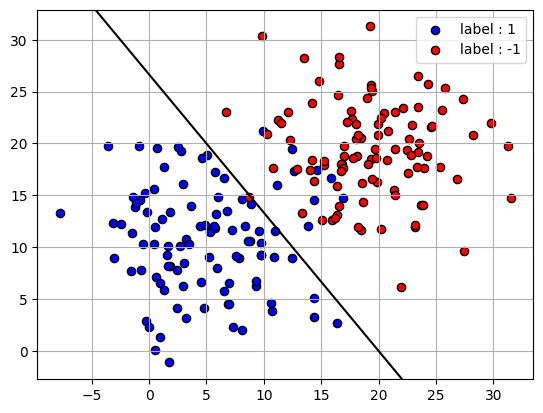

In [2]:
# generate samples from normal distributions with two dimensional
np.random.seed(0)
n = 100 # size of samples
X1 = np.random.normal(loc=(5, 10), scale=5, size=(n, 2)) # loc and scale indicate mean and variance
X2 = np.random.normal(loc=(20, 20), scale=5, size=(n, 2)) # X1 and X2 have different mean
T1 = np.ones(n)
T2 = np.ones(n) * -1                      # labeling as 1 for X1 and -1 for X2

# concatenate X1 and X2
X_train = np.concatenate((X1, X2))
T_train = np.concatenate((T1, T2))

X1_test = np.random.normal(loc=(5, 10), scale=5, size=(n, 2)) # loc and scale indicate mean and variance
X2_test = np.random.normal(loc=(20, 20), scale=5, size=(n, 2)) # X1 and X2 have different mean
T1_test = np.ones(n)
T2_test = np.ones(n) * -1                      # labeling as 1 for X1 and -1 for X2

# concatenate X1 and X2
X_test = np.concatenate((X1_test, X2_test))
T_test = np.concatenate((T1_test, T2_test))

plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)) # 30 grids for each axis
grids = np.c_[xx.ravel(), yy.ravel()]

ab = np.array([-0.4, -0.3])
c = np.array([8])
print(ab.shape, c.shape)

Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')

plt.show()

## **Task 1-1: Random Search**

* Implement and evaluate the most simplest baseline method of random search

In [3]:
best_acc = 0
max_iter = 1000
Pred_acc_best = 0
np.random.seed(0)
for i in range(max_iter):
  ab = np.random.normal(size=2) # Randomly Generate the Classifier Parameters
  c = np.random.normal(size=1)
  Pred_train = np.matmul(X_train, ab) + c
  Y_train = 2 * ((Pred_train) >= 0) - 1
  Pred_acc = np.sum((Y_train == T_train)) / len(Y_train)
  if Pred_acc >= Pred_acc_best:
    Pred_acc_best = Pred_acc # Update the Best Parameter Whenever the Best Training Sampple Accuracy Is Updated
    best_ab = ab
    best_c = c

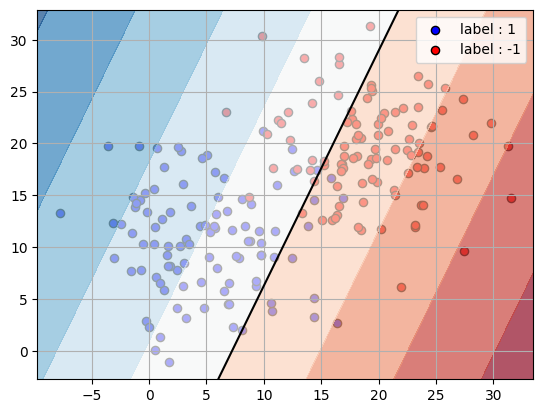

Training Accuracy :84.00%
Test Accuracy :84.00%


In [11]:
Pred_train = X_train@best_ab + best_c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@best_ab + best_c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@best_ab + best_c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)
plt.show()

#Print Accuracy
print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

## **Task 1-2: Train a Linear Classifier (Perceptron) with Gradient Descent**
**Objective:** Compute Loss and Gradients in Perceptron, and Update Parameters of Perceptron

* Compute loss of Perceptron (refer to the page 11 in lecture note)
* Compute Gradients by differentiating the loss (refer to the page 12-15 in lecture note)
* Update parameters by Gradient Descent (refer to the page 12-15 in lecture note)

In [14]:
max_iter = 1000
learning_rate = 0.01
np.random.seed(0)
ab = np.random.normal(size=2)   # Randomly Generate the Classifier Parameters
c = np.random.normal(size=1)

for i in range(max_iter):

  #Step 1: Make a perceptron (refer to page 14)
  Pred_train = np.matmul(X_train, ab) + c
  Y_train = 2 * ((Pred_train) >= 0) - 1

  #Step 2: Compute the loss (refer to page 15)
  loss = np.sum(Pred_train * (Y_train-T_train))

  #Step 3: Compute the gradients of each dimension (refer to page 15)
  grad_a = np.sum(X_train[:,0] * (Y_train - T_train))
  grad_b = np.sum(X_train[:,1] * (Y_train - T_train))
  grad_c = np.sum((Y_train - T_train))

  #Step 4: Update the weights (refer to page 15)
  ab[0] -= learning_rate * grad_a
  ab[1] -= learning_rate * grad_b
  c -= learning_rate * grad_c



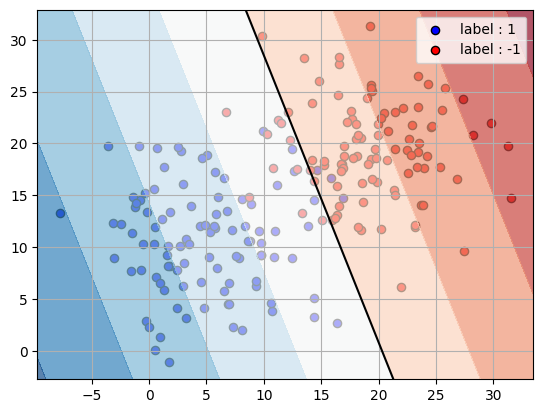

Training Accuracy :93.00%
Test Accuracy :93.00%


In [15]:
Pred_train = X_train@ab + c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@ab + c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)
plt.show()
#Print Training Accuracy
print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

## **Task 1-3: Train a Perceptron with Stochastic Gradient Descent (SGD)**
**Objective:** Implement Stochastic Gradient Descent (SGD) Algorithm
* Update parameters by Stochastic Gradient Descent (refer to the page 12 in lecture note)

In [16]:
max_iter = 1000
learning_rate = 0.01
np.random.seed(0)
ab = np.random.normal(size=2)   # Randomly Generate the Classifier Parameters
c = np.random.normal(size=1)

for i in range(max_iter):
  indices = np.arange(len(X_train))
  np.random.shuffle(indices)
  X_train_shuffle = X_train[indices]
  T_train_shuffle = T_train[indices]

  for j in range(len(X_train)):
    ############ Your code here ############
    #Step 1: Make a perceptron (refer to page 14)
    Pred_train = np.matmul(X_train_shuffle[j], ab) + c
    Y_train = 2 * ((Pred_train) >= 0) - 1

    #Step 2: Compute the loss (refer to page 15)
    loss = np.sum(Pred_train * (Y_train-T_train_shuffle[j]))

    #Step 3: Compute the gradients of each dimension (refer to page 15)
    grad_a = np.sum(X_train_shuffle[j,0] * (Y_train - T_train_shuffle[j]))
    grad_b = np.sum(X_train_shuffle[j,1] * (Y_train - T_train_shuffle[j]))
    grad_c = np.sum((Y_train - T_train_shuffle[j]))

    #Step 4: Update the weights (refer to page 15)
    ab[0] -= learning_rate * grad_a
    ab[1] -= learning_rate * grad_b
    c -= learning_rate * grad_c
    ########################################

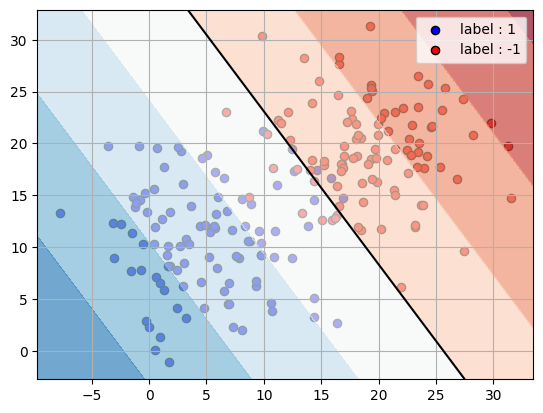

Training Accuracy :93.00%
Test Accuracy :93.50%


In [17]:
Pred_train = X_train@ab + c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@ab + c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)
plt.show()
#Print Accuracy
print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

## **Task 1-4: Train a Perceptron with mini-Batch SGD**
**Objective:** Implement mini-Batch SGD Algorithm
* Update parameters by mini-Batch SGD (refer to the page 12 in lecture note)

In [18]:
max_iter = 1000
learning_rate = 0.01
np.random.seed(0)
ab = np.random.normal(size=2)   # Randomly Generate the Classifier Parameters
c = np.random.normal(size=1)

batchsize = 10
n_batches = len(X_train) // batchsize

for i in range(max_iter):
  indices = np.arange(len(X_train))
  np.random.shuffle(indices)
  X_train_shuffle = X_train[indices]
  T_train_shuffle = T_train[indices]

  for j in range(n_batches):
    ############ Your code here ############
    #Step 1: Make a perceptron (refer to page 14)
    Pred_train = np.matmul(X_train_shuffle[j*batchsize:(j+1)*batchsize], ab) + c
    Y_train = 2 * ((Pred_train) >= 0) - 1

    #Step 2: Compute the loss (refer to page 15)
    loss = np.sum(Pred_train * (Y_train-T_train_shuffle[j*batchsize:(j+1)*batchsize]))

    #Step 3: Compute the gradients of each dimension (refer to page 15)
    grad_a = np.sum(X_train_shuffle[j*batchsize:(j+1)*batchsize,0] * (Y_train - T_train_shuffle[j*batchsize:(j+1)*batchsize]))
    grad_b = np.sum(X_train_shuffle[j*batchsize:(j+1)*batchsize,1] * (Y_train - T_train_shuffle[j*batchsize:(j+1)*batchsize]))
    grad_c = np.sum((Y_train - T_train_shuffle[j*batchsize:(j+1)*batchsize]))

    #Step 4: Update the weights (refer to page 15)
    ab[0] -= learning_rate * grad_a
    ab[1] -= learning_rate * grad_b
    c -= learning_rate * grad_c
    ########################################

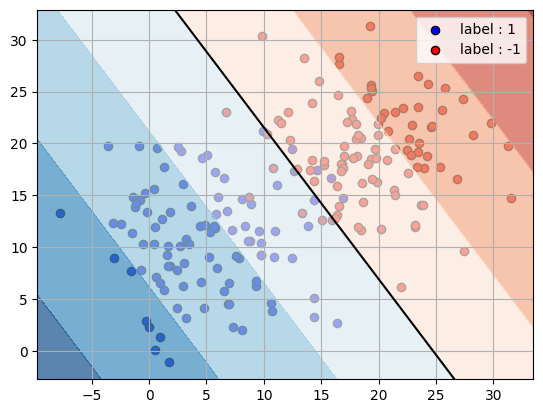

Training Accuracy :94.50%
Test Accuracy :94.00%


In [19]:

Pred_train = X_train@ab + c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@ab + c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)
plt.show()
#Print Accuracy
print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

## **Task 1-5: Train a Perceptron Using Scikit-Learn Package**
**Objective:** Try to use an open source machine learning library of scikit-learn
* Train a Perceptron with SGD using scikit-learn library

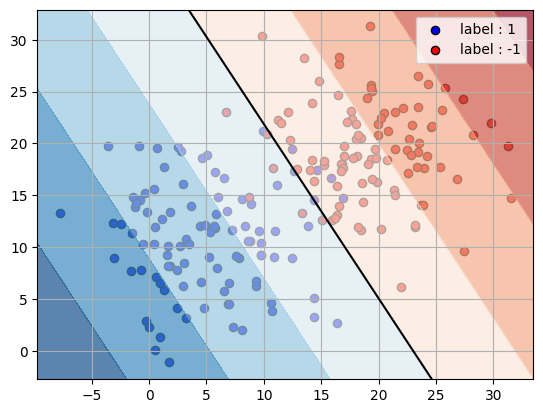

Training Accuracy :95.00%
Test Accuracy :95.00%


In [20]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

model = Perceptron(eta0=0.01, max_iter=1000, n_iter_no_change=500)
model.fit(X_train, T_train)

ab=model.coef_.T
c=model.intercept_

# Visualize
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)
plt.show()

Y_train = model.predict(X_train)
Y_test = model.predict(X_test)

#Print Accuracy
print('Training Accuracy :{:.2f}%'.format(100*accuracy_score(T_train, Y_train)))
print('Test Accuracy :{:.2f}%'.format(100*accuracy_score(T_test, Y_test)))

# **Task 2 (Optional): Implement a Perceptron and train perceptron on different dataset**

## **Task 2-1: Train a Perceptron on Iris Dataset**

**Objective:** Train a Percetron on a real data
* Train a Perceptron on Iris Dataset with SGD using scikit-learn library


In [ ]:
### Load Iris Dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Iris = load_iris()

X_Data = Iris.data
Y_Data = Iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X_Data, Y_Data, test_size=0.3, random_state = 0)

In [ ]:
model = Perceptron(eta0=0.1, max_iter=1000)
model.fit(X_train, Y_train)
Y_Pred_train = model.predict(X_train)
print('Training Accuracy :{:.2f}%'.format(100*accuracy_score(Y_train, Y_Pred_train)))

Y_Pred_test = model.predict(X_test)
print('Test Accuracy :{:.2f}%'.format(100*accuracy_score(Y_test, Y_Pred_test)))

## **Task 2-2: Train a Perceptron on 2 Class MNIST**

**Things to do:**

1. Vetorization (convert to 2D image to 1D vector form) -> using ```reshape()``` method
2. Standardization (normalize data to 0-1 range) -> just divide by 255

In [ ]:
# {4, 9} classes mnist dataset download and decompress
!pip install gdown
!gdown --id 1n70aILNV1U8I2VJlYekKuhBGbrNtCUNb
!tar -xvf mnist_49.tar
!rm -f mnist_49.tar

In [ ]:
# Load the dataset
X_train = np.load('mnist_49/X_train.npy')
X_test = np.load('mnist_49/X_test.npy')
Y_train = np.load('mnist_49/Y_train.npy')
Y_test = np.load('mnist_49/Y_test.npy')

# Basic Descriptions of dataset
print('Shape of data: {}'.format(X_train.shape[1:]))
print('Number of train data: {}'.format(len(Y_train)))
print('Number of test data: {}'.format(len(Y_test)))

# Image plotting
plt.subplot(1, 2, 1)
plt.imshow(X_train[Y_train==0][0], cmap='gray_r')
plt.title('Digit: 4')
plt.xticks([]); plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(X_train[Y_train==1][0], cmap='gray_r')
plt.title('Digit: 9')
plt.xticks([]); plt.yticks([])
plt.show()

**Vectorization & Standardization**

In [ ]:
# Reshape the training and test examples

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

print('X_train_flatten shape: ' + str(X_train_flatten.shape))
print('Y_train shape: ' + str(Y_train.shape))
print('X_test_flatten shape: ' + str(X_test_flatten.shape))
print('Y_test shape: ' + str(Y_test.shape))

X_train_std = X_train_flatten / 255.
X_test_std = X_test_flatten / 255.

X_train_flatten shape: (11791, 784)
Y_train shape: (11791,)
X_test_flatten shape: (1991, 784)
Y_test shape: (1991,)


**Model Training**

In [ ]:
model = Perceptron(eta0=0.1, max_iter=5000)
model.fit(X_train_std, Y_train)
Y_Pred_train = model.predict(X_train_std)
print('Training Accuracy :{:.2f}%'.format(100*accuracy_score(Y_train, Y_Pred_train)))

Y_Pred_test = model.predict(X_test_std)
print('Test Accuracy :{:.2f}%'.format(100*accuracy_score(Y_test, Y_Pred_test)))

In [ ]:
# Plotting results
np.random.seed(2020)
idxs = np.random.choice(len(Y_test), 10, replace=False)
label_to_class = {0: '4', 1: '9'}

plt.figure(figsize=(16, 8))
for i, idx in enumerate(idxs):
  plt.subplot(2, 5, i + 1)
  predict = model.predict(X_test_std)
  pred_label = (predict[idx] >= 0.5).astype(int)
  plt.imshow(X_test[idx], cmap='gray_r')
  plt.title('Digit Prediction: {} '.format(label_to_class[pred_label]), fontsize=14)
  plt.xticks([]); plt.yticks([])